**1. Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


**2. Load Datasets**

In [4]:
# Load datasets
train_data = pd.read_csv('/content/Assignment_Train.csv')
test_data = pd.read_csv('/content/Assignment_Test.csv')
feature_dict = pd.read_excel('/content/Assignment_FeatureDictionary.xlsx')

# Display the first few rows of each dataset
print(train_data.head())
print(test_data.head())
print(feature_dict.head())


   DEALER ID APPLICATION LOGIN DATE HDB BRANCH NAME HDB BRANCH STATE  \
0     106989             07/20/2022        DELHI-SF            DELHI   
1     108975             07/28/2022        PATNA-SF            BIHAR   
2     111004             07/15/2022   DARJEELING-SF      WEST BENGAL   
3     192020               07/04/22   SAHARANPUR-SF    UTTAR PRADESH   
4      55095             07/15/2022       MODASA-SF          GUJARAT   

  FIRST NAME MIDDLE NAME  LAST NAME      mobile AADHAR VERIFIED Cibil Score  \
0      SUNIL         NaN    CHANDER  9210574080              NO         726   
1      AMRIT         NaN      KUMAR  8877987018              NO         NaN   
2    ANIMESH         NaN      THAPA  8910862135              NO         737   
3     ADITYA         NaN      SINGH  9758428017              NO         713   
4     PARMAR  HARESHBHAI  AMRUTBHAI  9687028486              NO         669   

   ...  Phone Social Premium.shaadi Phone Social Premium.skype  \
0  ...                    

**3. Prepare Data**

In [5]:
# Separate features and target variable
X_train = train_data.drop(columns=['Application Status'])
y_train = train_data['Application Status']
X_test = test_data.drop(columns=['UID'])


**4. Identify Numeric and Categorical Columns**

In [6]:
# Identify numeric and categorical columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns


**5. Create Preprocessing Pipelines**

In [7]:
#Numeric Data Pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Categorical Data Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])



**6. Combine Pipelines Using ColumnTransformer**

In [8]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('cat', categorical_pipeline, categorical_columns)
])


**7. Fit and Transform Data**

In [9]:
# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**8. Split Data for Validation**

In [10]:
# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42
)


**9. Train the Model**

In [11]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)


RandomForestClassifier(random_state=42)

**10. Evaluate the Model**

Accuracy Score: 0.8495
Classification Report:
               precision    recall  f1-score   support

    APPROVED       0.94      0.83      0.88      1327
    DECLINED       0.72      0.89      0.80       673

    accuracy                           0.85      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.87      0.85      0.85      2000

Confusion Matrix:
 [[1098  229]
 [  72  601]]


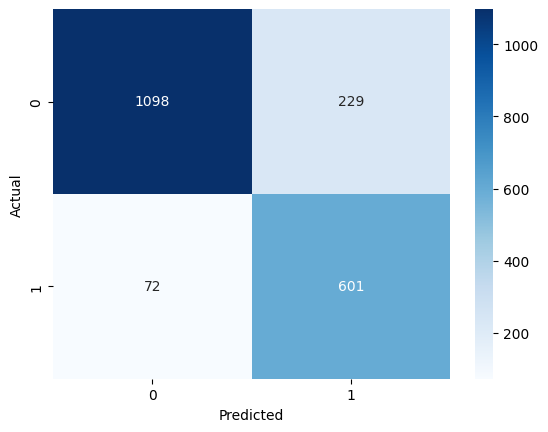

In [12]:
# Evaluate model
y_val_pred = model.predict(X_val_split)
print("Accuracy Score:", accuracy_score(y_val_split, y_val_pred))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_split, y_val_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_val_split, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**11. Predict on Test Data and Create Submission File**

In [13]:
# Predict on test data
test_predictions = model.predict(X_test_processed)

# Create submission file
submission = pd.DataFrame({
    'UID': test_data['UID'],
    'Prediction': test_predictions
})

submission.to_csv('predictions.csv', index=False)
